In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import seaborn as sns

In [3]:
df=pd.read_excel('ChurnPerdictFinal.xlsx')

In [3]:
dfclass = df.groupby('current_bussiness_status').count() # checking the number of examples in both classes
dfclass


,bussinesID,billing_cycle,country,created_on,last_login,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint
current_bussiness_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11954,11954,11549,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954
1,1242,1242,1231,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242


In [4]:
df.isna().sum() # checking null values in the dataset

bussinesID                    0
billing_cycle                 0
country                     416
created_on                    0
last_login                    0
tenure                        0
stores/franchise              0
no_of_repair_jobs             0
no_of_customers               0
total_revenue                 0
amount_receivable             0
no_of_purchases               0
use_Paypal                    0
use_Cayan                     0
use_Stripe                    0
use_MailChimp                 0
use_PaypalHere                0
use_SquareDeep                0
use_MobileSentrix             0
use_CustomerPortal            0
use_PrintNode                 0
use_Square                    0
use_SmsGlobal                 0
use_SmsBroadcast              0
use_ClickaTell                0
use_RingCentral               0
use_Square.1                  0
use_RepairDeskPay             0
use_FreePBX                   0
use_GoogleCloudPrint          0
current_bussiness_status      0
dtype: i

In [4]:
df['country']=df['country'].replace({'Null':'Unkown', np.nan:'Unkown'}) # replacing the 'null' and nan values in the country column with Unkown. So we dont loose elements related to class 1 


In [25]:
df.isna().sum()

bussinesID                  0
billing_cycle               0
country                     0
created_on                  0
last_login                  0
tenure                      0
stores/franchise            0
no_of_repair_jobs           0
no_of_customers             0
total_revenue               0
amount_receivable           0
no_of_purchases             0
use_Paypal                  0
use_Cayan                   0
use_Stripe                  0
use_MailChimp               0
use_PaypalHere              0
use_SquareDeep              0
use_MobileSentrix           0
use_CustomerPortal          0
use_PrintNode               0
use_Square                  0
use_SmsGlobal               0
use_SmsBroadcast            0
use_ClickaTell              0
use_RingCentral             0
use_Square.1                0
use_RepairDeskPay           0
use_FreePBX                 0
use_GoogleCloudPrint        0
current_bussiness_status    0
dtype: int64

In [7]:
dfclass = df.groupby('current_bussiness_status').count()
dfclass

,bussinesID,billing_cycle,country,created_on,last_login,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint
current_bussiness_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954
1,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242


In [9]:
df.shape

(13196, 31)

In [5]:
df=df.replace('(NULL)', pd.to_datetime('2021-01-15')) # replace the 'NULL' String with todays date in the created on and last_login columns

In [ ]:
df

In [6]:
df[['last_login']]
df['last_login'] = pd.to_datetime(df.last_login)
# creating a new column called "days since last login" to utilize this column. Just subtract date from todays date. to get values
# same goes for creatod on, days since creation

df[['created_on']]
df['created_on'] = pd.to_datetime(df.created_on)



df['last_login'] = df['last_login'].dt.strftime('%Y-%m-%d')
df[['last_login']]
df['today'] = pd.to_datetime('2021-01-15').strftime('%Y-%m-%d')



df['created_on'] = df['created_on'].dt.strftime('%Y-%m-%d')
df[['created_on']]
df['today'] = pd.to_datetime('2021-01-15').strftime('%Y-%m-%d')


df['last_login'] = pd.to_datetime(df['last_login'])
df['today'] = pd.to_datetime(df['today'])
df['Days last_login'] = df['today'] - df['last_login']




df['created_on'] = pd.to_datetime(df['created_on'])
df['today'] = pd.to_datetime(df['today'])
df['Days created_on'] = df['today'] - df['created_on']


del df['today']
del df['last_login']
del df['created_on']

del df['bussinesID']
df['Days last_login']=df['Days last_login'].dt.days

df['Days created_on']=df['Days created_on'].dt.days


In [ ]:
df

In [48]:
df3= df[(df["total_revenue"] > 0)] # removing all the rows with revenue = 0 for data visualization purpose


In [ ]:
df3

In [50]:
df.nunique()
#finding number of unique values in all columns of the dataset

billing_cycle                  2
country                      247
tenure                         6
stores/franchise              23
no_of_repair_jobs           1309
no_of_customers             1393
total_revenue               1650
amount_receivable           1583
no_of_purchases              157
use_Paypal                     2
use_Cayan                      2
use_Stripe                     2
use_MailChimp                  2
use_PaypalHere                 2
use_SquareDeep                 2
use_MobileSentrix              2
use_CustomerPortal             2
use_PrintNode                  2
use_Square                     2
use_SmsGlobal                  2
use_SmsBroadcast               2
use_ClickaTell                 2
use_RingCentral                2
use_Square.1                   2
use_RepairDeskPay              2
use_FreePBX                    2
use_GoogleCloudPrint           2
current_bussiness_status       2
Days last_login             1875
Days created_on             2036
dtype: int

In [53]:
df4 = df.groupby('current_bussiness_status').count()
df4
# Checking the class distribution at this point in pre processing

,billing_cycle,country,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,Days last_login,Days created_on
current_bussiness_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954,11954
1,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242


In [ ]:
grouped_single = df.groupby(['billing_cycle','country']).agg({'amount_receivable': ['median', 'min', 'max']})
grouped_single[[('amount_receivable','median')]].max()


amount_receivable  median    93718439.0
dtype: float64

Text(0.5, 1.0, 'Dist. of stores/franchise')

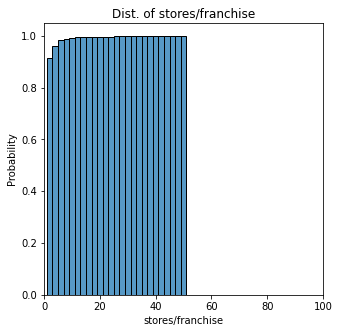

In [ ]:
# Visual analysis of data
# the continuos values are plotted against their distributions, to find the outliers in our case. For example 80-90 % data is ok. values
#above these are considered outliers IQR will be a bad approach because it will remove 0 revenue values which result in loss of many
# rows. And makes the class imbalance problem severe. 

plt.figure(figsize=(5,5))
ax = sns.histplot(x="stores/franchise",data=df3,binwidth=2, stat="probability",cumulative=True)
ax.set_xlim(0,df['stores/franchise'].max())
ax.set_title("Dist. of stores/franchise")

Text(0.5, 1.0, 'Dist. of no_of_repair_jobs')

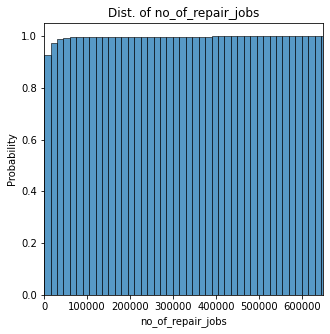

In [ ]:
# Visual analysis of data

plt.figure(figsize=(5,5))
ax = sns.histplot(x="no_of_repair_jobs",data=df3,binwidth=15000, stat="probability",cumulative=True)
ax.set_xlim(0,df['no_of_repair_jobs'].max())
ax.set_title("Dist. of no_of_repair_jobs")

Text(0.5, 1.0, 'Dist. of no_of_customers')

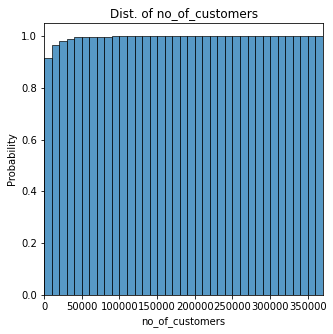

In [ ]:
# Visual analysis of data

plt.figure(figsize=(5,5))
ax = sns.histplot(x="no_of_customers",data=df3,binwidth=10000, stat="probability",cumulative=True)
ax.set_xlim(0,df['no_of_customers'].max())
ax.set_title("Dist. of no_of_customers")

Text(0.5, 1.0, 'Dist. of total_revenue')

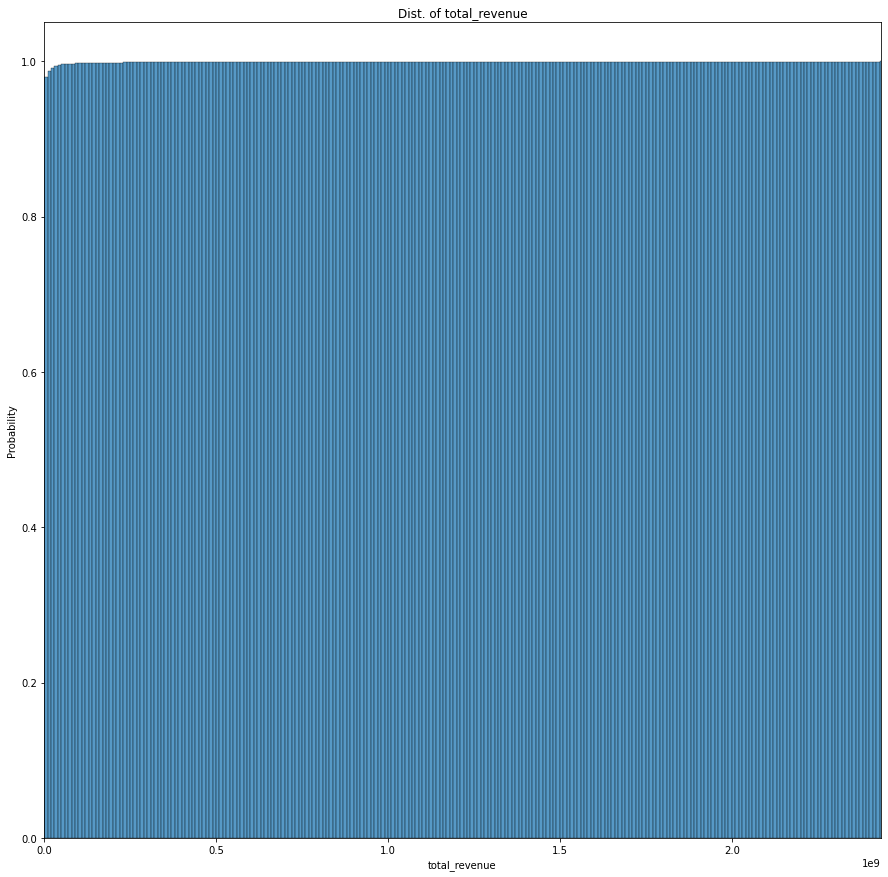

In [ ]:
# Visual analysis of data

plt.figure(figsize=(15,15))
ax = sns.histplot(x="total_revenue",data=df3,binwidth=10000000, stat="probability",cumulative=True)
ax.set_xlim(0, df['total_revenue'].max())
ax.set_title("Dist. of total_revenue")

In [54]:
df2= df[(df["current_bussiness_status"] > 0)]
df2 = df2.groupby(['country','current_bussiness_status']).agg({'current_bussiness_status': ['count']})
df2[[('current_bussiness_status','count')]]
# distribution of class 1 rows shows that america has the most number of 1 class memebers

,,current_bussiness_status
,,count
country,current_bussiness_status,
Angola,1,1
Argentina,1,2
Australia,1,157
Austria,1,2
Bahamas,1,1
...,...,...
Tunisia,1,1
United Arab Emirates,1,1


In [ ]:
# Visual analysis of data

plt.figure(figsize=(5,5))
ax = sns.histplot(x="amount_receivable",data=df3,binwidth=10000000, stat="probability",cumulative=True)
ax.set_xlim(0,100000000)
ax.set_title("Dist. of amount_receivable")

In [7]:
df

,billing_cycle,country,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,Days last_login,Days created_on
0,Monthly,United Arab Emirates,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,30,2002
1,Monthly,United Kingdom,0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,2149
2,Monthly,United States,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,11,2148
3,Monthly,United Kingdom,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1137,2146
4,Monthly,Pakistan,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1872,2145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,Monthly,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6
13192,Monthly,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6
13193,Monthly,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6
13194,Monthly,Hong Kong,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6


Text(0.5, 1.0, 'Dist. of no_of_customers')

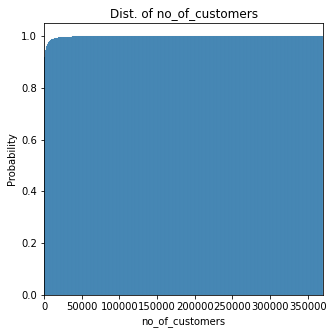

In [ ]:
# Visual analysis of data

plt.figure(figsize=(5,5))
ax = sns.histplot(x="no_of_customers",data=df,binwidth=100, stat="probability",cumulative=True)
ax.set_xlim(0,df['no_of_customers'].max())
ax.set_title("Dist. of no_of_customers")

Text(0.5, 1.0, 'Dist. of stores/franchise')

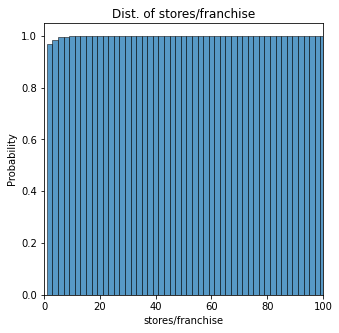

In [ ]:
# Visual analysis of data

plt.figure(figsize=(5,5))
ax = sns.histplot(x="stores/franchise",data=df,binwidth=2, stat="probability",cumulative=True)
ax.set_xlim(0,df['stores/franchise'].max())
ax.set_title("Dist. of stores/franchise")

In [ ]:
df

In [ ]:
df= df[(df["stores/franchise"] < 14) & (df["no_of_repair_jobs"] < 49300) & (df["no_of_customers"] < 14000)  & (df["total_revenue"] < 100000000) & (df["amount_receivable"] < 100000000) & (df["no_of_purchases"] < 640)]
#removing values that are more than a threshold decided by looking at data distributions of different columns.
#Outlier removal

In [ ]:
df

In [ ]:
df_2= df[(df["stores/franchise"] < 2) & (df["no_of_repair_jobs"] < 15000) & (df["no_of_customers"] < 10000)  & (df["total_revenue"] < 100000000) & (df["amount_receivable"] < 100000000) & (df["no_of_purchases"] < 640)]
df_2
#another outlier removal technique applied by looking at the mean of all groups in the dataset

In [13]:
df["country"] = df["country"].astype('category')
df["country"] = df["country"].cat.codes

,billing_cycle,country,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,Days last_login,Days created_on
0,Monthly,172,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,30,2002
1,Monthly,173,0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,2149
2,Monthly,174,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,11,2148
3,Monthly,173,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1137,2146
4,Monthly,126,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1872,2145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,Monthly,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6
13192,Monthly,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6
13193,Monthly,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6
13194,Monthly,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6


In [14]:
#One hot encoding for rootype column
one_hot = pd.get_dummies(df['billing_cycle'])
df = df.drop('billing_cycle',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,country,tenure,stores/franchise,no_of_repair_jobs,no_of_customers,total_revenue,amount_receivable,no_of_purchases,use_Paypal,use_Cayan,use_Stripe,use_MailChimp,use_PaypalHere,use_SquareDeep,use_MobileSentrix,use_CustomerPortal,use_PrintNode,use_Square,use_SmsGlobal,use_SmsBroadcast,use_ClickaTell,use_RingCentral,use_Square.1,use_RepairDeskPay,use_FreePBX,use_GoogleCloudPrint,current_bussiness_status,Days last_login,Days created_on,Monthly,Yearly
0,172,5,5,593,5465,111802.33,43684.29,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,0,30,2002,1,0
1,173,0,1,3,2,198.19,89.10,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,2149,1,0
2,174,5,10,567,26,257540.08,121470.29,0,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,0,11,2148,1,0
3,173,2,2,43,38,2485.78,2030.79,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1137,2146,1,0
4,126,0,1,9,2,1370.00,1120.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,1872,2145,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6,1,0
13192,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6,1,0
13193,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6,1,0
13194,73,0,1,0,0,0.00,0.00,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,6,1,0


In [15]:
predictors=df.columns.tolist()
predictors.remove('current_bussiness_status')
print(len(predictors))

30


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
target_column = ['current_bussiness_status']

X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=2)
print(X_train.shape); print(X_test.shape)
#Decision tree Classification
from sklearn.tree import DecisionTreeClassifier
regr_1 = DecisionTreeClassifier(max_depth=7)
regr_2 = DecisionTreeClassifier(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


print(f1_score(y_true, y_1))
print(f1_score(y_true, y_2))

(10556, 30)
(2640, 30)
0.8662674650698604
0.869215291750503
